In [1]:
import pandas as pd 
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
date_rng=pd.date_range(start='2022-01-01',end='2022-12-31',freq='D')
data={'ds':date_rng,
            'y':range(1,len(date_rng)+1)}
df=pd.DataFrame(data)

In [4]:
df.tail()

,ds,y
360,2022-12-27,361
361,2022-12-28,362
362,2022-12-29,363
363,2022-12-30,364
364,2022-12-31,365


In [5]:
model=Prophet()
model.fit(df)

11:38:13 - cmdstanpy - INFO - Chain [1] start processing
11:38:14 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future_dates=model.make_future_dataframe(periods=365)
print(future_dates.tail())

            ds
725 2023-12-27
726 2023-12-28
727 2023-12-29
728 2023-12-30
729 2023-12-31


In [7]:
forecast=model.predict(future_dates)

In [10]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2023-12-27,725.999924,725.964272,726.031929
726,2023-12-28,726.999927,726.964021,727.032044
727,2023-12-29,727.999926,727.964150,728.031866
728,2023-12-30,728.999916,728.964069,729.032081
729,2023-12-31,729.999915,729.963345,730.032248


c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


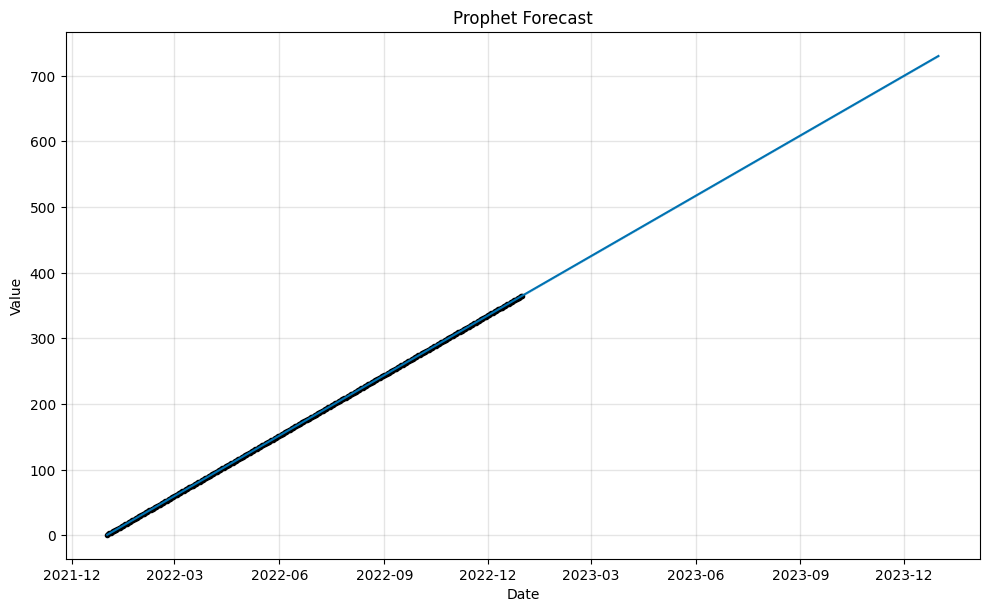

In [11]:
fig=model.plot(forecast,xlabel='Date',ylabel='Value')
plt.title('Prophet Forecast')
plt.show()